## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay
from sqlite3 import connect

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [ ]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [ ]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [ ]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [ ]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [ ]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [ ]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [ ]:
#Menampikan tipe data tiap kolom
df.dtypes

NameError: name 'df' is not defined

In [ ]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [ ]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
df_filtered = df[(df["is_valid"] == 1) & (df["category"] == 'Mobiles & Tablets') & (df["order_date"].dt.year == 2022)]

df_agg = df_filtered.groupby('sku_name')['qty_ordered'].sum().reset_index()

df_sorted = df_agg.sort_values('qty_ordered', ascending=False).reset_index()

df_top5 = df_sorted.head(5)

df_top5

NameError: name 'df' is not defined

In [ ]:
df_grouped = df_filtered.groupby('sku_name')['qty_ordered'].sum().reset_index()
df_grouped


,sku_name,qty_ordered
0,Apple iPhone 6S Plus 16GB Silver,3
1,IDROID_BALRX7-Gold,1000
2,IDROID_BALRX7-Jet black,31
3,Infinix Hot 4-Gold,15
4,MotoZPlay -Black,1
5,MotoZPlay-White,1
6,Samsung-Galaxy-S8-G955-Plus-Black,5
7,Samsung_A7-2017-Gold,2
8,Samsung_Galaxy_S8_Plus_Black,1
9,Samsung_Galaxy_S8_black,2


In [ ]:
df_sorted = df_grouped.sort_values('qty_ordered', ascending=False).reset_index()
df_sorted



,index,sku_name,qty_ordered
0,1,IDROID_BALRX7-Gold,1000
1,2,IDROID_BALRX7-Jet black,31
2,3,Infinix Hot 4-Gold,15
3,43,samsung_Grand Prime Plus-Black,11
4,34,infinix_Zero 4-Grey,10
5,44,samsung_Grand Prime Plus-Silver,10
6,37,iphone_7-128GB-wof-Matt Black,6
7,6,Samsung-Galaxy-S8-G955-Plus-Black,5
8,36,iphone_7-128GB-wof-Jet Black,5
9,39,samsungGALAXY J510F-2016 DS LTE-Gold,4


In [ ]:
top_5_products = df_sorted.head(5)
top_5_products


,index,sku_name,qty_ordered
0,1,IDROID_BALRX7-Gold,1000
1,2,IDROID_BALRX7-Jet black,31
2,3,Infinix Hot 4-Gold,15
3,43,samsung_Grand Prime Plus-Black,11
4,34,infinix_Zero 4-Grey,10


In [ ]:
print(top_5_products)

   index                        sku_name  qty_ordered
0      1              IDROID_BALRX7-Gold         1000
1      2        IDROID_BALRX7-Jet black            31
2      3              Infinix Hot 4-Gold           15
3     43  samsung_Grand Prime Plus-Black           11
4     34             infinix_Zero 4-Grey           10


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [ ]:
# Memfilter data dengan is_valid = 1 dan kategori "Others"
df_filtered = df[(df['is_valid'] == 1)]

# Memfilter data untuk tahun 2021 dan 2022
df_2021 = df_filtered[df_filtered['order_date'].dt.year == 2021]
df_2022 = df_filtered[df_filtered['order_date'].dt.year == 2022]

# Mengelompokkan data berdasarkan sku_name dan menghitung total qty_ordered untuk setiap tahun
df_2021_grouped = df_2021.groupby('category')['qty_ordered'].sum().reset_index()
df_2022_grouped = df_2022.groupby('category')['qty_ordered'].sum().reset_index()

# Menggabungkan data 2021 dan 2022
df_combined = pd.merge(df_2021_grouped, df_2022_grouped, on='category', how='outer', suffixes=('_2021', '_2022'))

# Menghitung penurunan kuantitas penjualan
df_combined['qty_decrease'] = df_combined['qty_ordered_2021'] - df_combined['qty_ordered_2022']

# Menampilkan 15 kategori dengan penurunan tertinggi
top_15_decrease = df_combined.sort_values('qty_decrease', ascending=False).head(15)

print(top_15_decrease)

              category  qty_ordered_2021  qty_ordered_2022  qty_decrease
10              Others               426               263           163
12             Soghaat               759               612           147
8          Men Fashion               237               175            62
1    Beauty & Grooming               168               153            15
0           Appliances               124               148           -24
2                Books               171               195           -24
5      Health & Sports               173               200           -27
3            Computing               109               153           -44
11  School & Education               184               237           -53
6        Home & Living               193               250           -57
7          Kids & Baby               170               227           -57
4        Entertainment                77               150           -73
13          Superstore               327           

## `Jawaban No 2.2`

In [ ]:
# Mengambil 20 produk dengan penurunan tertinggi
top_20_decrease = df_combined.sort_values('qty_decrease', ascending=False).head(20)
print(top_20_decrease)

                                              sku_name  qty_ordered_2021  \
69                       RB_Dettol Germ Busting Kit-bf             200.0   
84                                 Telemall_MM-DR-HB-L              23.0   
141                                    kansai_NeverWet              10.0   
133                                         emart_00-1               7.0   
43                                      MEGUIAR_G12711               4.0   
2                                   Aladdin_bike_cover               3.0   
120            aw_Ultra Shine Wash & Wax-64oz./1893ml                2.0   
87                                     Tmall_MM-DR-PAD               2.0   
22   Entertainer Asia_Vouch 365-2017 Mobile App Lahore               2.0   
39                                       MEGUIAR_A1214               1.0   
130                                 electro_Humidifier               1.0   
37                                       Lacie_9000146               1.0   
49          

## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
# Memfilter data dengan is_gross = 1, is_valid = 0, is_net = 0, dan tahun 2022
df_filtered = df[(df['is_gross'] == 1) & (df['is_valid'] == 0) & (df['is_net'] == 0) & (df['order_date'].dt.year == 2022)]

# Mengambil kolom yang dibutuhkan (customer_id dan registered_date)
df_customer = df_filtered[['customer_id', 'registered_date']].drop_duplicates()

# Menampilkan data
print(df_customer)


     customer_id registered_date
9       C246762L      2022-05-08
18      C848774L      2021-11-07
19      C693415L      2022-04-12
21      C180595L      2022-04-22
22      C587425L      2022-03-22
...          ...             ...
5855    C653797L      2022-04-03
5856    C394076L      2021-10-12
5859    C248585L      2022-07-10
5865    C471304L      2022-05-13
5881    C265450L      2022-02-17

[820 rows x 2 columns]


In [ ]:
#Mengunduh dataset
from google.colab import files
df_customer.to_excel('customer_list.xlsx')
files.download('customer_list.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

<ipython-input-32-46095f7f84bd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day'] = df_filtered['order_date'].dt.day_name()
<ipython-input-32-46095f7f84bd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['order_date'].dt.month_name()
<ipython-input-32-46095f7f84bd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

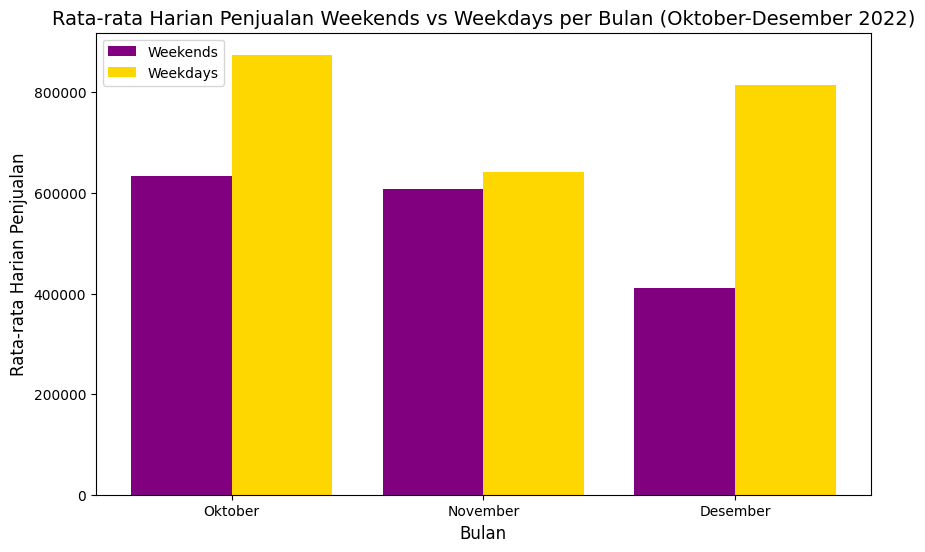

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Langkah 1: Memfilter data untuk transaksi valid dan bulan Oktober-Desember 2022
df_filtered = df[(df['is_valid'] == 1) & (df['order_date'].dt.year == 2022) & (df['order_date'].dt.month.isin([10, 11, 12]))]

# Langkah 2: Menambahkan kolom day, month, dan month_number
df_filtered['day'] = df_filtered['order_date'].dt.day_name()
df_filtered['month'] = df_filtered['order_date'].dt.month_name()
df_filtered['month_number'] = df_filtered['order_date'].dt.month

# Langkah 3: Memisahkan data weekends dan weekdays
weekends = df_filtered[df_filtered['day'].isin(['Saturday', 'Sunday'])]
weekdays = df_filtered[df_filtered['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Langkah 4: Mengelompokkan data berdasarkan bulan dan menghitung rata-rata harian penjualan
weekends_grouped = weekends.groupby('month_number')['before_discount'].mean().reset_index()
weekdays_grouped = weekdays.groupby('month_number')['before_discount'].mean().reset_index()

# Langkah 5: Menggabungkan data weekends dan weekdays
df_combined = pd.merge(weekends_grouped, weekdays_grouped, on='month_number', suffixes=('_weekends', '_weekdays'))

# Langkah 6: Membuat grafik batang
plt.figure(figsize=(10, 6))

# Plot untuk weekends
plt.bar(df_combined['month_number'] - 0.2, df_combined['before_discount_weekends'], width=0.4, label='Weekends', color='purple')

# Plot untuk weekdays
plt.bar(df_combined['month_number'] + 0.2, df_combined['before_discount_weekdays'], width=0.4, label='Weekdays', color='gold')

# Menambahkan judul dan label
plt.title('Rata-rata Harian Penjualan Weekends vs Weekdays per Bulan (Oktober-Desember 2022)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Harian Penjualan', fontsize=12)
plt.xticks(df_combined['month_number'], ['Oktober', 'November', 'Desember'])  # Mengatur label bulan
plt.legend()

# Menampilkan grafik
plt.show()


## `Jawaban No 4.2`

<ipython-input-96-0812d04913d0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Average Sales', data=df_avg, palette=['purple', 'gold'])


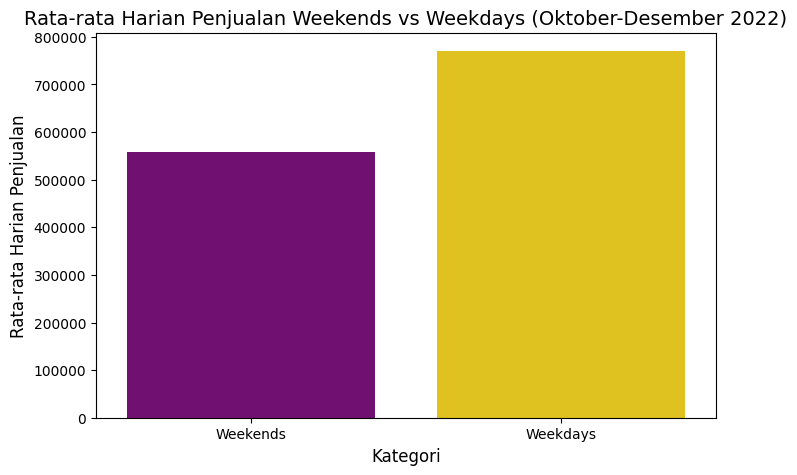

In [ ]:
# Data rata-rata harian penjualan weekends dan weekdays keseluruhan 3 bulan
avg_data = {
    'Category': ['Weekends', 'Weekdays'],
    'Average Sales': [avg_weekends, avg_weekdays]
}
df_avg = pd.DataFrame(avg_data)

# Mengatur ukuran grafik
plt.figure(figsize=(8, 5))

# Membuat grafik batang
sns.barplot(x='Category', y='Average Sales', data=df_avg, palette=['purple', 'gold'])

# Menambahkan judul dan label
plt.title('Rata-rata Harian Penjualan Weekends vs Weekdays (Oktober-Desember 2022)', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Rata-rata Harian Penjualan', fontsize=12)

# Menampilkan grafik
plt.show()